In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv');

In [57]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [58]:
df.describe()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,889.709932,22.383747,3.102709,1.695260,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,515.555875,3.300664,1.763937,0.472665,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,2.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,447.500000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,876.000000,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,1341.750000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,3.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


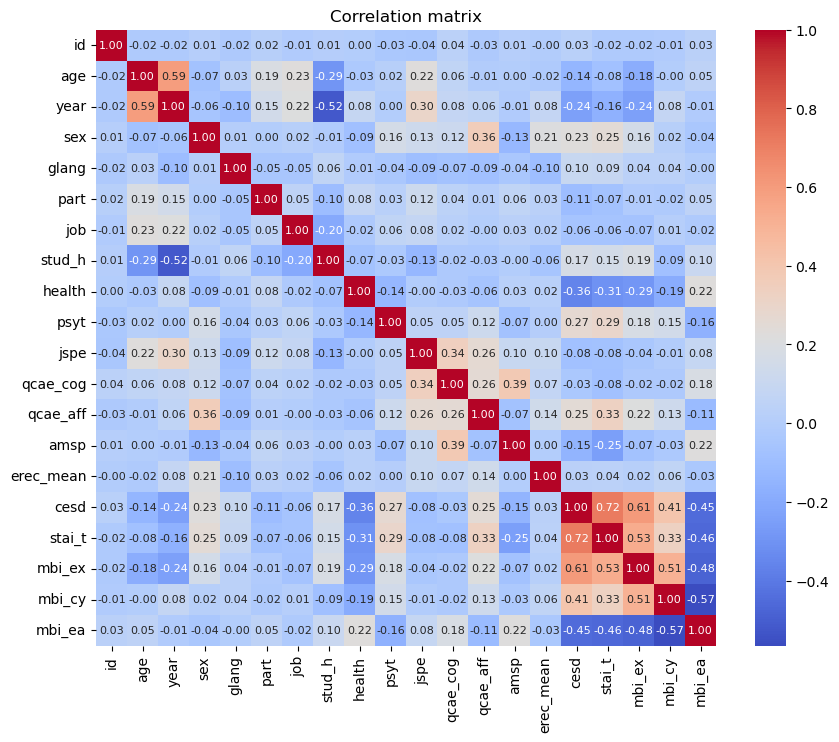

In [59]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8}) 
plt.title("Correlation matrix")
plt.show()

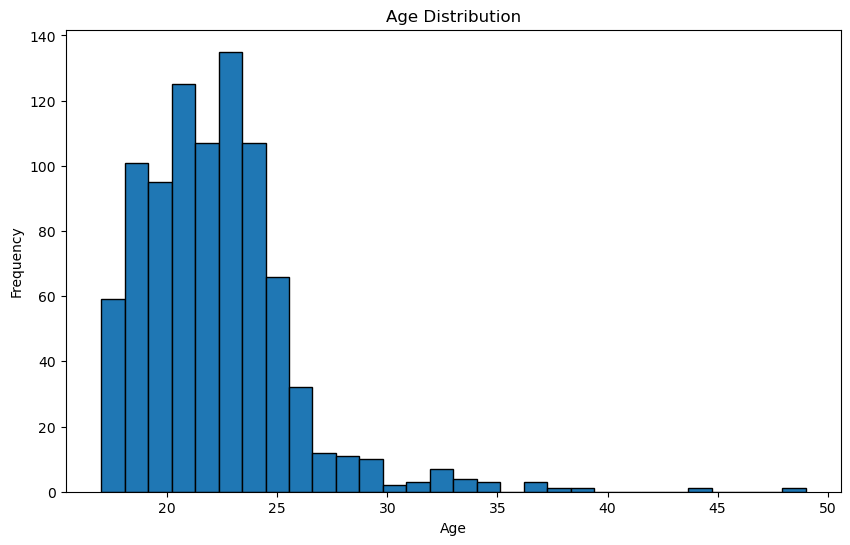

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Counts')

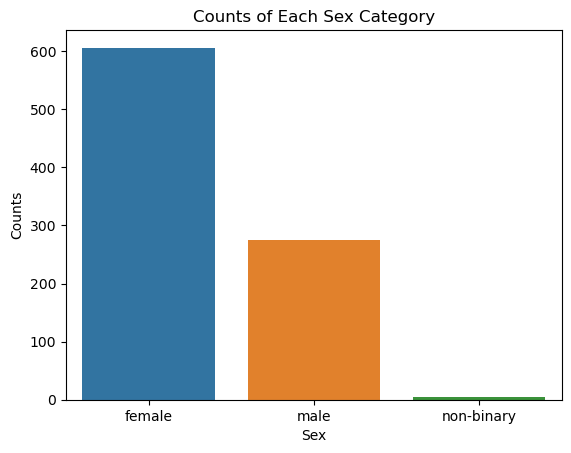

In [83]:
replace_values = {1: 'male', 2: 'female', 3: 'non-binary'}
df['sex'] = df['sex'].replace(replace_values)

sex_counts = df['sex'].value_counts()

sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Counts of Each Sex Category')
plt.xlabel('Sex')
plt.ylabel('Counts')

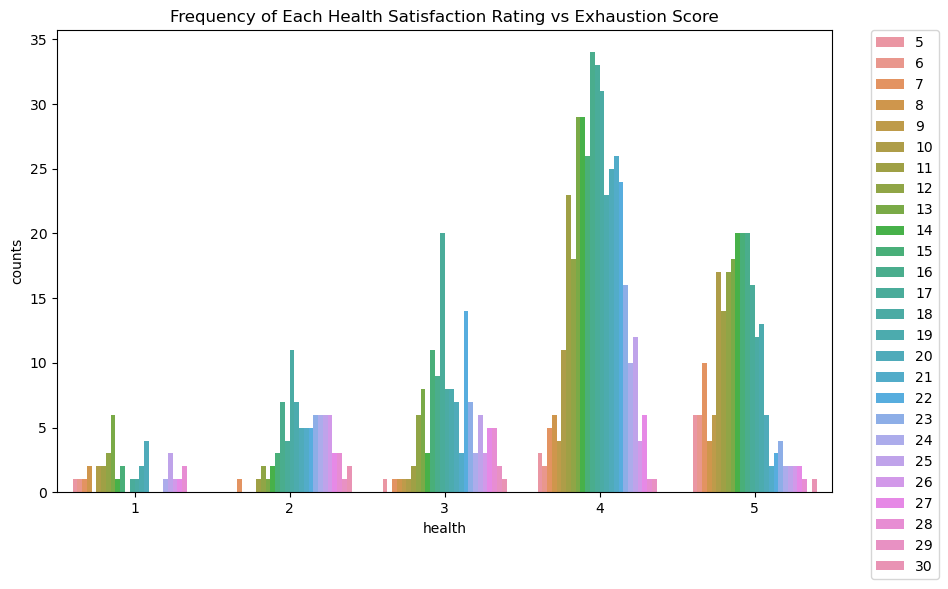

In [80]:
grouped_df = df.groupby(['health', 'mbi_ex']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='health', y='counts', hue='mbi_ex', data=grouped_df)
plt.title('Frequency of Each Health Satisfaction Rating vs Exhaustion Score')
bar_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

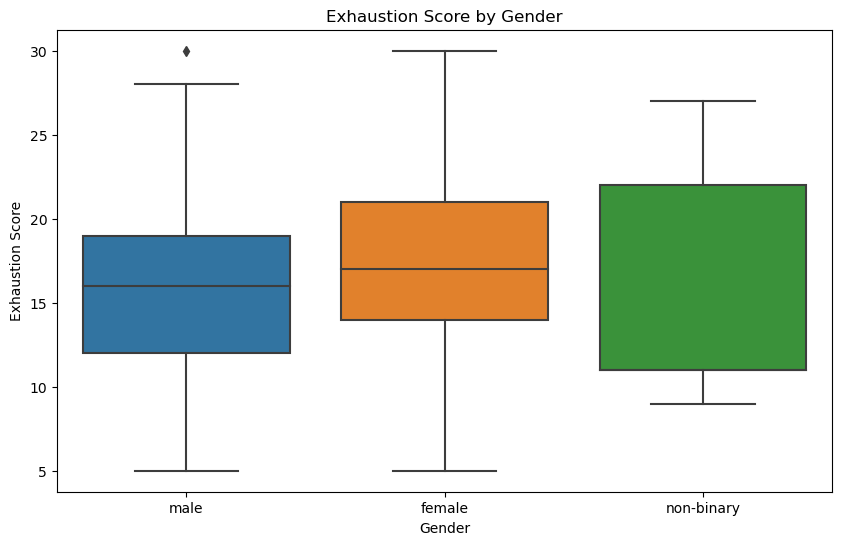

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='mbi_ex', data=df)
plt.title('Exhaustion Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Exhaustion Score')
plt.show()

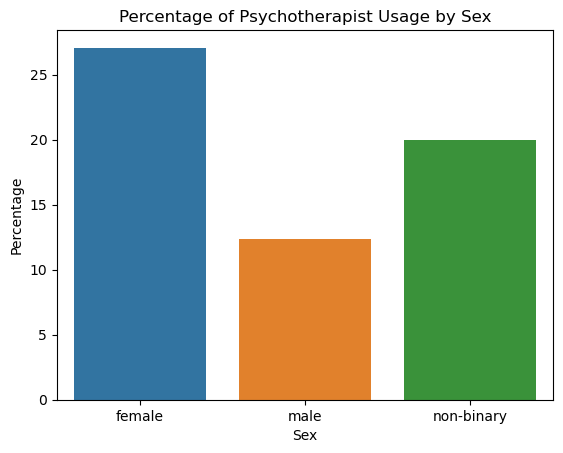

In [88]:
df_percentages = df.groupby('sex')['psyt'].apply(lambda x: x.mean() * 100)
df_percentages = df_percentages.reset_index(name='percentage')
df_percentages['sex'] = df_percentages['sex'].replace({0: 'No', 1: 'Yes'})
sns.barplot(x='sex', y='percentage', data=df_percentages)

plt.title('Percentage of Psychotherapist Usage by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')

plt.show()